In [2]:
!pip uninstall -y xgboost lightgbm

In [3]:
!pip install xgboost==1.5.0 lightgbm==3.3.2

     -------------------------------------- 106.6/106.6 MB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 10.7 MB/s eta 0:00:00


In [4]:
!pip install hyperopt

     ---------------------------------------- 1.6/1.6 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 203.0/203.0 kB 6.0 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

train = pd.read_csv("~/iffel/data/credit_train.csv")
test = pd.read_csv("~/iffel/data/credit_test.csv")

In [7]:
train.shape

(170883, 32)

In [8]:
test.shape

(113923, 31)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [11]:
train.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
train.describe()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,...,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000,170883.000000
mean,85441.000000,61091.567090,-0.169838,0.040771,0.493037,0.117429,-0.176102,0.058235,-0.080669,0.032227,...,-0.028287,-0.083744,-0.022450,0.009008,0.092269,0.012603,0.002093,0.002445,87.336704,0.002107
std,49329.817362,27828.109419,1.850529,1.610874,1.383241,1.371910,1.338609,1.295123,1.208518,1.227630,...,0.743713,0.667318,0.584508,0.598760,0.465505,0.490660,0.391951,0.307315,245.954429,0.045851
min,0.000000,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,42720.500000,41216.500000,-0.986667,-0.539174,-0.064747,-0.743475,-0.828769,-0.691129,-0.586314,-0.162638,...,-0.230722,-0.546777,-0.170294,-0.332459,-0.195933,-0.330346,-0.065125,-0.027054,5.480000,0.000000
50%,85441.000000,60776.000000,-0.183560,0.109679,0.623352,0.124307,-0.226228,-0.202634,-0.031932,0.056664,...,-0.054462,-0.066786,-0.036211,0.059474,0.135662,-0.058966,0.008693,0.021152,21.890000,0.000000
75%,128161.500000,78622.000000,1.184446,0.804221,1.297352,0.937632,0.374445,0.449200,0.462616,0.350995,...,0.128337,0.363165,0.098707,0.415860,0.399458,0.272938,0.089727,0.078302,76.720000,0.000000
max,170882.000000,120396.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


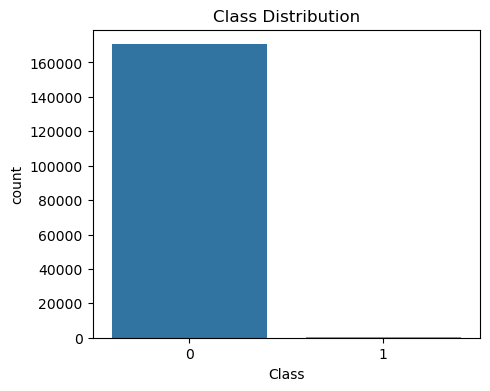

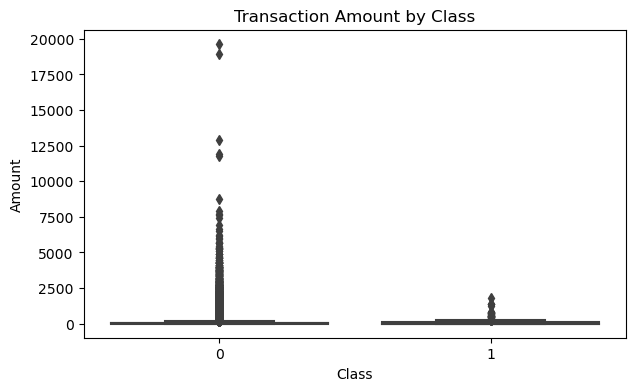

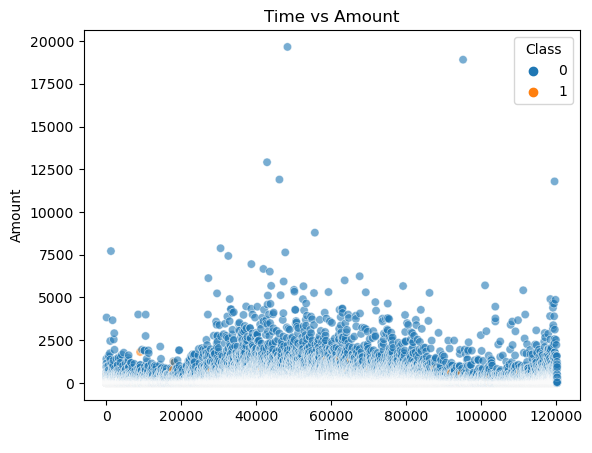

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class 분포 시각화
plt.figure(figsize=(5, 4))
sns.countplot(x='Class', data=train)
plt.title('Class Distribution')
plt.show()

# 거래 금액 분포
plt.figure(figsize=(7, 4))
sns.boxplot(x='Class', y='Amount', data=train)
plt.title('Transaction Amount by Class')
plt.show()

# Time과 Amount 상관
sns.scatterplot(x='Time', y='Amount', hue='Class', data=train, alpha=0.6)
plt.title('Time vs Amount')
plt.show()


불균형 비율: 사기 거래 약 0.17%

In [15]:
# ID 컬럼이 있는 경우, X에서 제외
drop_cols = ['Class']

if 'ID' in train.columns:
    drop_cols.append('ID')

X = train.drop(columns=drop_cols)
y = train['Class']

# 스케일링 (Time, Amount)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])
test[['Time', 'Amount']] = scaler.transform(test[['Time', 'Amount']])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [19]:
X_train.shape, X_valid.shape,  y_train.shape, y_valid.shape

((136706, 31), (34177, 31), (136706,), (34177,))

In [20]:
#기본 모델 학습 비교

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier(eval_metric='logloss', scale_pos_weight=(len(y)/sum(y)), random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    f1 = f1_score(y_valid, preds)
    results[name] = f1
    print(f"\n🔹 {name} F1-score: {f1:.4f}")
    print(classification_report(y_valid, preds))

C:\Users\82107\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index



🔹 LogisticRegression F1-score: 0.1282
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     34105
           1       0.07      0.93      0.13        72

    accuracy                           0.97     34177
   macro avg       0.53      0.95      0.56     34177
weighted avg       1.00      0.97      0.98     34177


🔹 RandomForest F1-score: 0.9104
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34105
           1       0.98      0.85      0.91        72

    accuracy                           1.00     34177
   macro avg       0.99      0.92      0.96     34177
weighted avg       1.00      1.00      1.00     34177



C:\Users\82107\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\82107\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



🔹 XGBoost F1-score: 0.9197
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34105
           1       0.97      0.88      0.92        72

    accuracy                           1.00     34177
   macro avg       0.98      0.94      0.96     34177
weighted avg       1.00      1.00      1.00     34177



In [22]:
# 불균형 처리
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_res))

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)
preds = lr.predict(X_valid)
print("F1 after SMOTE:", f1_score(y_valid, preds))

     -------------------------------------- 258.3/258.3 kB 5.3 MB/s eta 0:00:00
     -------------------------------------- 308.4/308.4 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Before SMOTE: [136418    288]
After SMOTE: [136418 136418]
F1 after SMOTE: 0.16156670746634025


In [23]:
# 앙상블

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', models["LogisticRegression"]),
        ('rf', models["RandomForest"]),
        ('xgb', models["XGBoost"])
    ],
    voting='soft'
)

voting_clf.fit(X_train_res, y_train_res)
voting_preds = voting_clf.predict(X_valid)

print("VotingClassifier F1-score:", f1_score(y_valid, voting_preds))

C:\Users\82107\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\82107\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


VotingClassifier F1-score: 0.7852760736196318


In [32]:
# 하이퍼파라미터 튜닝 (두모델)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Random Forest 튜닝

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_grid = RandomizedSearchCV(
    rf_model,
    rf_params,
    n_iter=8,     # 8개 조합만 랜덤 추출
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=1
)
rf_grid.fit(X_train_res, y_train_res)

print(" [RandomForest] Best Params:", rf_grid.best_params_)
print(" [RandomForest] Best F1 (CV):", rf_grid.best_score_)



Fitting 3 folds for each of 8 candidates, totalling 24 fits
 [RandomForest] Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
 [RandomForest] Best F1 (CV): 0.9998277533286406


In [34]:

# XGBoost 튜닝

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

xgb_model = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=(len(y)/sum(y)),
    random_state=42
)

xgb_grid = RandomizedSearchCV(
    xgb_model,
    xgb_params,
    n_iter=8,     # 8개 조합만 랜덤 추출
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=1
)
xgb_grid.fit(X_train_res, y_train_res)

print(" [XGBoost] Best Params:", xgb_grid.best_params_)
print(" [XGBoost] Best F1 (CV):", xgb_grid.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\82107\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\82107\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\82107\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when 

C:\Users\82107\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\82107\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\82107\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when 

C:\Users\82107\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\82107\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


 [XGBoost] Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2}
 [XGBoost] Best F1 (CV): 0.9996226223273134


In [35]:
#최적 모델로 검증 데이터 평가

from sklearn.metrics import classification_report, f1_score

# 최적 모델 가져오기
best_rf = rf_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

# 검증셋 예측
rf_preds = best_rf.predict(X_valid)
xgb_preds = best_xgb.predict(X_valid)

rf_f1 = f1_score(y_valid, rf_preds)
xgb_f1 = f1_score(y_valid, xgb_preds)

print(f"\n[Validation F1-score]")
print(f"RandomForest: {rf_f1:.4f}")
print(f"XGBoost: {xgb_f1:.4f}")

print("\n[RandomForest Classification Report]")
print(classification_report(y_valid, rf_preds))

print("\n[XGBoost Classification Report]")
print(classification_report(y_valid, xgb_preds))


[Validation F1-score]
RandomForest: 0.9065
XGBoost: 0.8129

[RandomForest Classification Report]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34105
           1       0.94      0.88      0.91        72

    accuracy                           1.00     34177
   macro avg       0.97      0.94      0.95     34177
weighted avg       1.00      1.00      1.00     34177


[XGBoost Classification Report]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34105
           1       0.76      0.88      0.81        72

    accuracy                           1.00     34177
   macro avg       0.88      0.94      0.91     34177
weighted avg       1.00      1.00      1.00     34177



In [37]:
# SMOTE 적용 후 F1 비교

# 1️⃣ RandomForest + SMOTE 데이터 학습
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf.fit(X_train_res, y_train_res)
rf_preds = rf.predict(X_valid)
print("RandomForest F1 after SMOTE:", f1_score(y_valid, rf_preds))


RandomForest F1 after SMOTE: 0.9064748201438849


In [38]:
# 2️⃣ XGBoost + SMOTE 데이터 학습
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train_res, y_train_res)
xgb_preds = xgb.predict(X_valid)
print("XGBoost F1 after SMOTE:", f1_score(y_valid, xgb_preds))

C:\Users\82107\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBoost F1 after SMOTE: 0.8936170212765957


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

# 1️⃣ Logistic Regression + SMOTE 데이터 학습
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)
lr_preds = lr.predict(X_valid)
lr_f1 = f1_score(y_valid, lr_preds)

# 2️⃣ RandomForest + SMOTE 데이터 학습 (최적 파라미터)
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf.fit(X_train_res, y_train_res)
rf_preds = rf.predict(X_valid)
rf_f1 = f1_score(y_valid, rf_preds)

# 3️⃣ XGBoost + SMOTE 데이터 학습 (최적 파라미터)
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.2,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train_res, y_train_res)
xgb_preds = xgb.predict(X_valid)
xgb_f1 = f1_score(y_valid, xgb_preds)

# 📊 결과 비교 출력
print("\n[Validation F1-score]")
print(f"LogisticRegression: {lr_f1:.4f}")
print(f"RandomForest:       {rf_f1:.4f}")
print(f"XGBoost:            {xgb_f1:.4f}")

print("\n[Logistic Regression Classification Report]")
print(classification_report(y_valid, lr_preds, digits=4))

print("\n[RandomForest Classification Report]")
print(classification_report(y_valid, rf_preds, digits=4))

print("\n[XGBoost Classification Report]")
print(classification_report(y_valid, xgb_preds, digits=4))


C:\Users\82107\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[Validation F1-score]
LogisticRegression: 0.1616
RandomForest:       0.9065
XGBoost:            0.8936

[Logistic Regression Classification Report]
              precision    recall  f1-score   support

           0     0.9998    0.9801    0.9899     34105
           1     0.0886    0.9167    0.1616        72

    accuracy                         0.9800     34177
   macro avg     0.5442    0.9484    0.5757     34177
weighted avg     0.9979    0.9800    0.9881     34177


[RandomForest Classification Report]
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     34105
           1     0.9403    0.8750    0.9065        72

    accuracy                         0.9996     34177
   macro avg     0.9700    0.9374    0.9531     34177
weighted avg     0.9996    0.9996    0.9996     34177


[XGBoost Classification Report]
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9998     34105
           1     

In [54]:
# 최종 모델 선택
if xgb_f1 > rf_f1:
    final_model = xgb
    print("✅ 최종 모델: XGBoost")
else:
    final_model = rf
    print("✅ 최종 모델: RandomForest")

# test.csv 다시 로드 (id 포함)
test = pd.read_csv("~/iffel/data/credit_test.csv")

# 학습에 사용한 피처 이름만 남기기
# (y = train['Class'] 로 뺐으니 X.columns에는 Class가 없음)
X_test_final = test[[col for col in X.columns if col in test.columns]]

# 예측
final_preds = final_model.predict(X_test_final)

# 제출 파일 생성
submission = pd.DataFrame({
    'id': test['id'],
    'Class': final_preds
})

# 저장
submission.to_csv('submission.csv', index=False)
print("\n📁 submission.csv 저장 완료!")
submission.head()


✅ 최종 모델: RandomForest

📁 submission.csv 저장 완료!


,id,Class
0,170883,0
1,170884,0
2,170885,0
3,170886,0
4,170887,0


In [55]:
submission.tail()

,id,Class
113918,284801,0
113919,284802,0
113920,284803,0
113921,284804,0
113922,284805,0
